In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ra6e_n_o because the default path (/home/jupyter-stiw/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
t = sp.symbols('t')

In [4]:
def dot(u,v):
    return sp.integrate(u*v,(t,0,1))
def norm(u):
    return dot(u,u)**(1/2)

In [5]:
n=5
yi = [t**k for k in range(n+1)]
yi

[1, t, t**2, t**3, t**4, t**5]

In [6]:
[[dot(u,v) for u in yi] for v in yi]

[[1, 1/2, 1/3, 1/4, 1/5, 1/6],
 [1/2, 1/3, 1/4, 1/5, 1/6, 1/7],
 [1/3, 1/4, 1/5, 1/6, 1/7, 1/8],
 [1/4, 1/5, 1/6, 1/7, 1/8, 1/9],
 [1/5, 1/6, 1/7, 1/8, 1/9, 1/10],
 [1/6, 1/7, 1/8, 1/9, 1/10, 1/11]]

In [9]:
# Initialisierung
xi = [yi[0]/norm(yi[0])]
# for-Schleife
for k in range(0,n):
    zi = yi[k+1] - np.sum([dot(yi[k+1],xi[j])*xi[j] for j in range(k+1)])
    # zi normieren
    xi.append(zi/norm(zi))

In [10]:
xi

[1,
 3.46410161513775*t - 1.73205080756888,
 13.4164078649987*t**2 - 13.4164078649987*t + 2.23606797749978,
 52.9150262212977*t**3 - 79.372539331946*t**2 + 31.7490157327781*t - 2.6457513110648,
 209.999999998974*t**4 - 419.999999998102*t**3 + 269.99999999891*t**2 - 59.999999999797*t + 2.99999999999266,
 835.789447239549*t**5 - 2089.47361804672*t**4 + 1857.30988265096*t**3 - 696.491205966962*t**2 + 99.498743704512*t - 3.31662478992238]

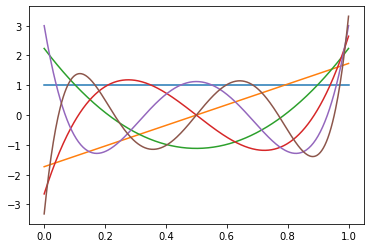

In [18]:
tp = np.linspace(0,1,400)
for xii in xi:
    f = sp.lambdify(t,xii,'numpy')
    plt.plot(tp,[f(tpi) for tpi in tp])

In [21]:
np.round(np.array([[dot(u,v) for u in xi] for v in xi],dtype=float),6)

array([[ 1.,  0.,  0., -0., -0.,  0.],
       [ 0.,  1.,  0.,  0., -0., -0.],
       [ 0.,  0.,  1.,  0., -0.,  0.],
       [-0.,  0.,  0.,  1., -0.,  0.],
       [-0., -0., -0., -0.,  1.,  0.],
       [ 0., -0.,  0.,  0.,  0.,  1.]])